<a href="https://colab.research.google.com/github/pratheeksha-maddi/traffic-sign-detection/blob/main/Stop_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [ ]:
# In this cell, we are dowloading dataset from kaggle by authenticating to Kaggle via kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle
!kaggle datasets download -d andrewmvd/road-sign-detection
!unzip road-sign-detection.zip -d data
!mv ./data/annotations ./data/labels

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 181, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open road-sign-detection.zip, road-sign-detection.zip.zip or road-sign-detection.zip.ZIP.
mv: cannot stat './data/annotations': No such file or directory


# Setup Yolov5

In [ ]:
# CLone yolov5 repo
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Total 16008 (delta 0), reused 0 (delta 0), pack-reused 16008
Receiving objects: 100% (16008/16008), 14.56 MiB | 23.09 MiB/s, done.
Resolving deltas: 100% (11011/11011), done.


In [ ]:
cd yolov5

/content/yolov5/yolov5


In [ ]:
!pwd

/content/yolov5/yolov5


In [ ]:
cd ..

/content/yolov5


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
from preprocessing import convert_voc_to_yolo

In [ ]:
!pwd

/content


In [ ]:
cd ..

/content


In [ ]:
convert_voc_to_yolo()

In [ ]:
!cp yolov5/data/VOC.yaml yolov5/VOC.yaml

In [ ]:
# # Write out this YAML
# path: ../data
# train: # train images (relative to 'path')  16551 images
#   - images
# val: # val images (relative to 'path')  4952 images
#   - images

# # Classes
# names:
#   0: trafficlight
#   1: speedlimit
#   2: crosswalk
#   3: stop

# Get Stuff Up and Running

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os

In [ ]:
cd yolov5

/content/yolov5


In [ ]:

!python train.py --img 320 --batch 16 --epochs 50 --data customVOC.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=customVOC.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.

In [ ]:
!pwd

/content/yolov5


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-7-2 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
/content/yolov5/runs/train/exp2/weights/best.pt

In [ ]:
%cd ../

/content


image 1/1: 400x300 1 speedlimit, 1 crosswalk
Speed: 2.1ms pre-process, 8.7ms inference, 1.6ms NMS per image at shape (1, 3, 640, 480)
image 1/1: 400x300 1 stop
Speed: 1.7ms pre-process, 8.5ms inference, 1.3ms NMS per image at shape (1, 3, 640, 480)
image 1/1: 400x300 1 speedlimit
Speed: 2.8ms pre-process, 8.5ms inference, 1.3ms NMS per image at shape (1, 3, 640, 480)
image 1/1: 400x300 1 speedlimit, 1 crosswalk
Speed: 1.6ms pre-process, 8.5ms inference, 1.3ms NMS per image at shape (1, 3, 640, 480)
image 1/1: 400x300 1 speedlimit
Speed: 1.6ms pre-process, 8.6ms inference, 1.2ms NMS per image at shape (1, 3, 640, 480)
image 1/1: 400x300 1 speedlimit
Speed: 1.6ms pre-process, 8.5ms inference, 1.1ms NMS per image at shape (1, 3, 640, 480)
image 1/1: 400x300 2 speedlimits
Speed: 1.6ms pre-process, 8.5ms inference, 1.3ms NMS per image at shape (1, 3, 640, 480)
image 1/1: 400x300 2 trafficlights, 2 crosswalks
Speed: 1.6ms pre-process, 8.5ms inference, 2.0ms NMS per image at shape (1, 3, 640,

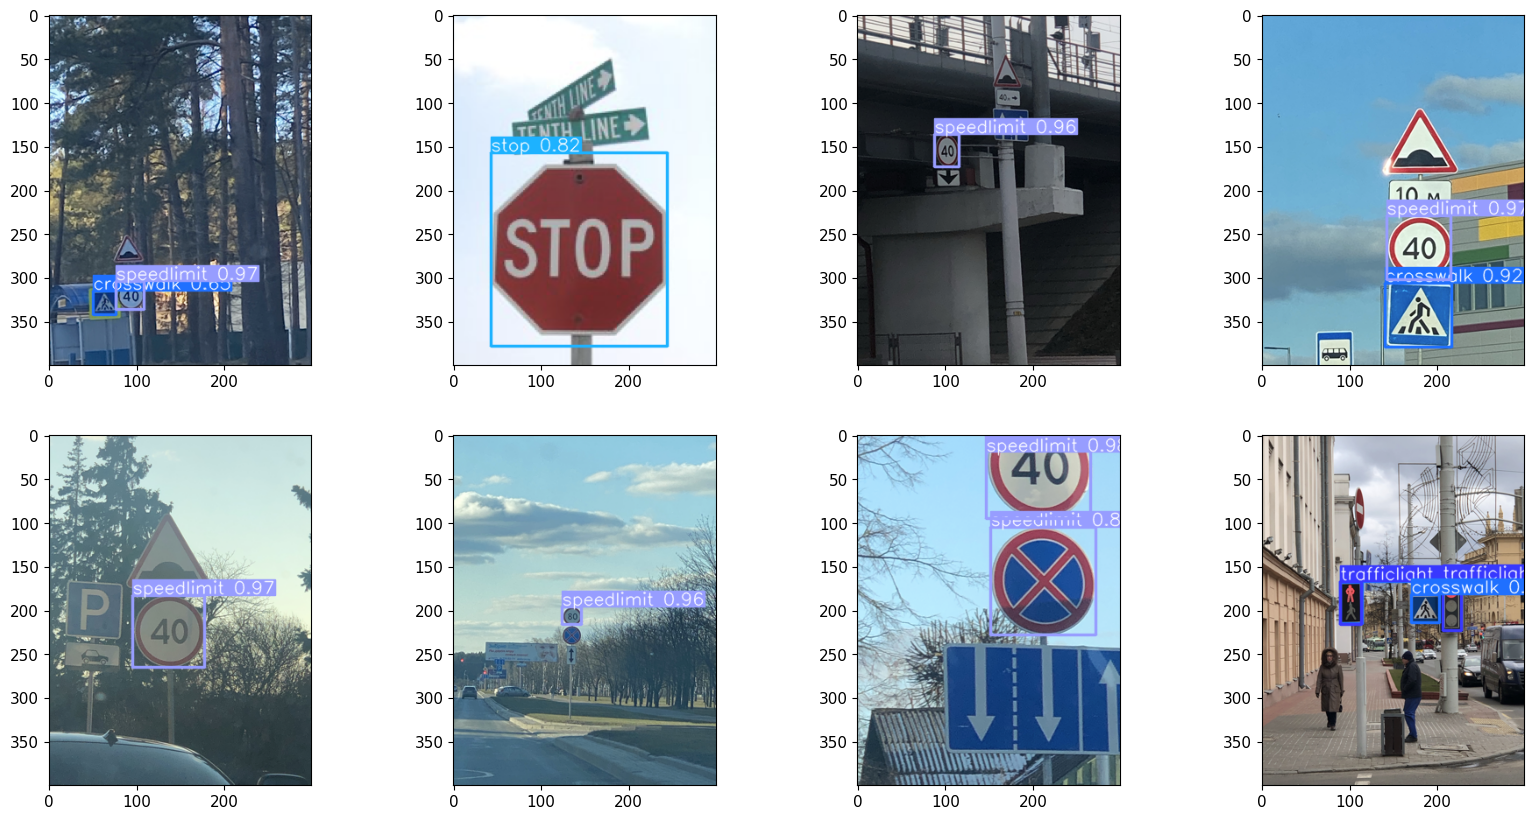

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(2,4, figsize=(20,10))
imgs = os.listdir('./data/images')

for idx in itertools.product(range(2),range(4)):
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'./data/images/{imgname}')
    results = model(img)
    print((results))
    ax[idx[0],idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cp -r ./yolov5 ./drive/MyDrive/my_yolov5

In [ ]:
!pwd

/content


In [ ]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [ ]:
# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from google.colab.patches import cv2_imshow

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))

  #custom code for detection
  img = js_to_image(data)
  results = model(img)
  # ax[idx[0],idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))
  cv2_imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))
  # for (x,y,w,h) in results:
  #     bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

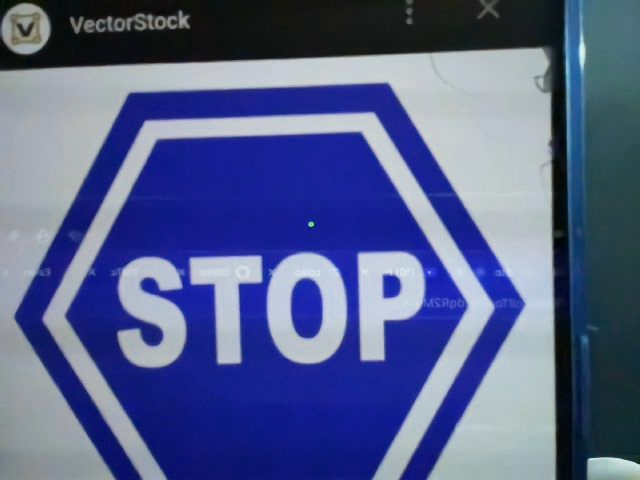

Saved to photo.jpg


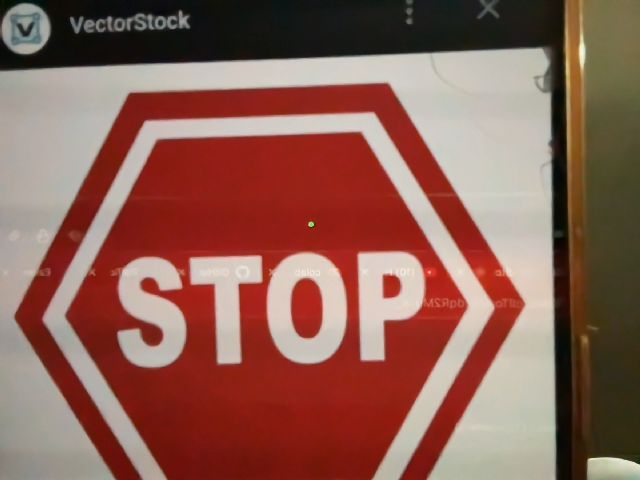

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!cp -r ./data ./drive/MyDrive/road_data